In [12]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import seaborn as sns


In [13]:
csv_name = "bills.csv"
data = pd.read_csv(csv_name)
print(data.head())
data.columns

   Age (years)  Blood Pressure  Blood Sugar  Diabetic  Medical Bill (INR)
0           43              91          105         0             3347.75
1           71             132          150         1             6795.85
2           50             101          128         1             4420.11
3           53              99          126         1             4516.24
4           12              73           99         0             1785.56


Index(['Age (years)', 'Blood Pressure', 'Blood Sugar', 'Diabetic',
       'Medical Bill (INR)'],
      dtype='object')

In [14]:
selected_features = ['Age (years)', 'Blood Pressure', 'Blood Sugar','Medical Bill (INR)']
target_feature = 'Diabetic'
X = data[selected_features]
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)
y = data[target_feature]
class_labels = ['0', '1']


[[-0.39790082 -0.53750832 -0.54241075 -0.65061369]
 [ 1.06727841  1.41032987  1.0911379   1.29502921]
 [-0.03160601 -0.06242584  0.29251411 -0.04551824]
 ...
 [-0.08393384  0.22262365  0.40141736  0.08974178]
 [-0.03160601 -0.53750832 -0.28830319 -0.45744313]
 [-2.07239137 -1.53518155 -1.48623886 -1.59052719]]


In [15]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

Optimal value of min_weight_fraction_leaf (gini criterion): 0.0
Optimal value of min_weight_fraction_leaf (entropy criterion): 0.0


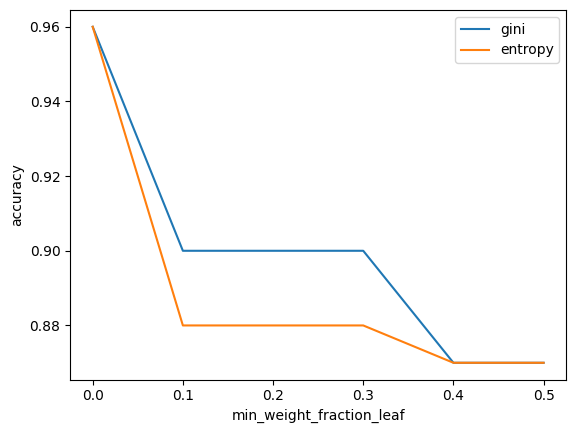

In [16]:

fractions = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
min_weight_fraction_leaf = []
acc_gini = []
acc_entropy = []

for i in fractions:
    dtree = DecisionTreeClassifier(criterion='gini', min_weight_fraction_leaf=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc_gini.append(accuracy_score(y_test, pred))

    dtree = DecisionTreeClassifier(criterion='entropy', min_weight_fraction_leaf=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc_entropy.append(accuracy_score(y_test, pred))

    min_weight_fraction_leaf.append(i)

d = pd.DataFrame({'acc_gini': pd.Series(acc_gini),
                  'acc_entropy': pd.Series(acc_entropy),
                  'min_weight_fraction_leaf': pd.Series(min_weight_fraction_leaf)})

# Find the optimal value of min_weight_fraction_leaf
optimal_gini = d['min_weight_fraction_leaf'][d['acc_gini'].idxmax()]
optimal_entropy = d['min_weight_fraction_leaf'][d['acc_entropy'].idxmax()]


print("Optimal value of min_weight_fraction_leaf (gini criterion):", optimal_gini)
print("Optimal value of min_weight_fraction_leaf (entropy criterion):", optimal_entropy)

# Visualizing changes in parameters
plt.plot('min_weight_fraction_leaf', 'acc_gini', data=d, label='gini')
plt.plot('min_weight_fraction_leaf', 'acc_entropy', data=d, label='entropy')
plt.xlabel('min_weight_fraction_leaf')
plt.ylabel('accuracy')
plt.legend()
plt.show()


Optimal value of min_samples_split (gini criterion): 14
Optimal value of min_samples_split (entropy criterion): 2


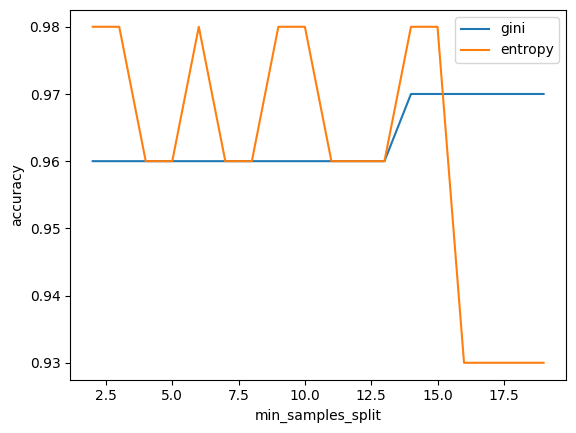

In [17]:
min_samples_split = []
acc_gini = []
acc_entropy = []

for i in range(2, 20, 1):
    dtree = DecisionTreeClassifier(criterion='gini', min_samples_split=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc_gini.append(accuracy_score(y_test, pred))

    dtree = DecisionTreeClassifier(criterion='entropy', min_samples_split=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc_entropy.append(accuracy_score(y_test, pred))

    min_samples_split.append(i)

d = pd.DataFrame({'acc_gini': pd.Series(acc_gini),
                  'acc_entropy': pd.Series(acc_entropy),
                  'min_samples_split': pd.Series(min_samples_split)})

# Find the optimal value of min_samples_split
optimal_gini_split = d['min_samples_split'][d['acc_gini'].idxmax()]
optimal_entropy_split = d['min_samples_split'][d['acc_entropy'].idxmax()]

print("Optimal value of min_samples_split (gini criterion):", optimal_gini_split)
print("Optimal value of min_samples_split (entropy criterion):", optimal_entropy_split)

# Visualizing changes in parameters
plt.plot('min_samples_split', 'acc_gini', data=d, label='gini')
plt.plot('min_samples_split', 'acc_entropy', data=d, label='entropy')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.legend()
plt.show()


Optimal value of max_depth (gini criterion): 3
Optimal value of max_depth (entropy criterion): 5


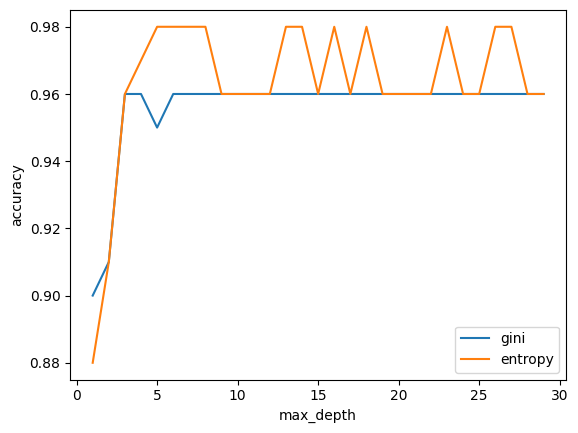

In [18]:
max_depth = []
acc_gini = []
acc_entropy = []

for i in range(1, 30):
    dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc_gini.append(accuracy_score(y_test, pred))

    dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc_entropy.append(accuracy_score(y_test, pred))

    max_depth.append(i)

d = pd.DataFrame({'acc_gini': pd.Series(acc_gini),
                  'acc_entropy': pd.Series(acc_entropy),
                  'max_depth': pd.Series(max_depth)})

# Find the optimal value of max_depth
optimal_gini_depth = d['max_depth'][d['acc_gini'].idxmax()]
optimal_entropy_depth = d['max_depth'][d['acc_entropy'].idxmax()]

print("Optimal value of max_depth (gini criterion):", optimal_gini_depth)
print("Optimal value of max_depth (entropy criterion):", optimal_entropy_depth)

# Visualizing changes in parameters
plt.plot('max_depth', 'acc_gini', data=d, label='gini')
plt.plot('max_depth', 'acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()


In [19]:
# optimal_min_weight_fraction_leaf = optimal_gini
# optimal_min_samples_split = optimal_gini_split
# optimal_max_depth = optimal_gini_depth
# optimal_criterion = 'gini'

optimal_min_weight_fraction_leaf = optimal_entropy
optimal_min_samples_split = optimal_entropy_split
optimal_max_depth = optimal_entropy_depth
optimal_criterion = 'entropy'



# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion=optimal_criterion, max_depth=optimal_max_depth,
                              min_samples_split=optimal_min_samples_split,
                                min_weight_fraction_leaf=optimal_min_weight_fraction_leaf)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.98


[]

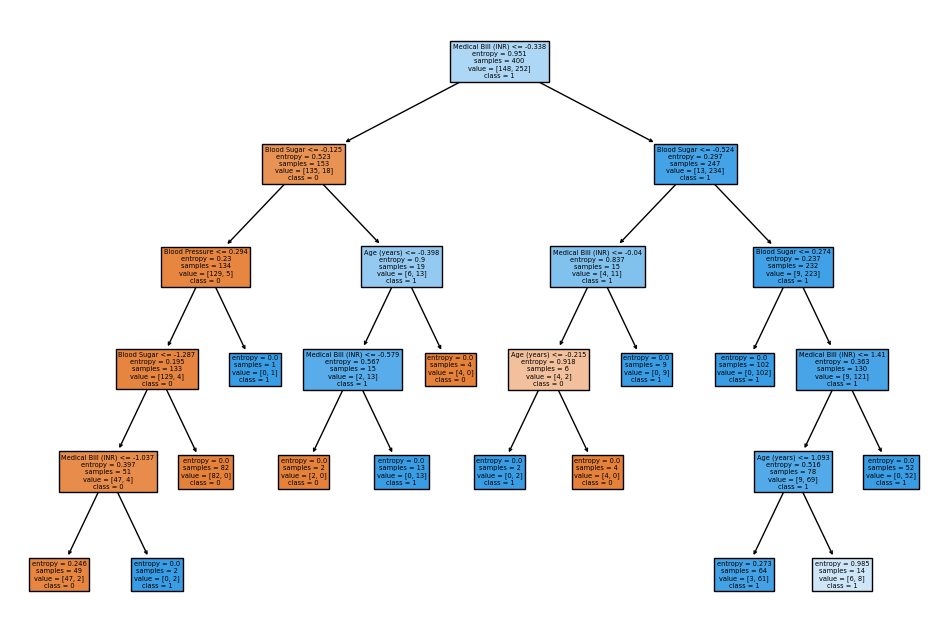

In [20]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=selected_features, class_names=class_labels)
# plot_tree(model)
plt.plot()

#Gini Impurity(df) = 1- p²(0)-p²(1) 

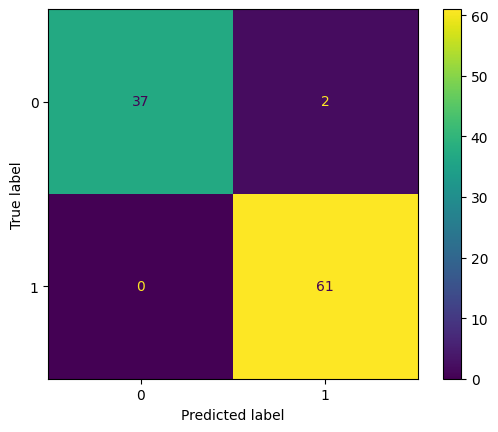

In [21]:

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=class_labels)
disp.plot()

In [22]:
new_data_frame = {'Age (years)': [25], 'Blood Pressure': [120], 'Blood Sugar': [0], 'Medical Bill (INR)': [10000]}
new_data = pd.DataFrame(new_data_frame)
new_data = scaler.transform(new_data)
clf = DecisionTreeClassifier(criterion=optimal_criterion, max_depth=optimal_max_depth,
                              min_samples_split=optimal_min_samples_split,
                                min_weight_fraction_leaf=optimal_min_weight_fraction_leaf)
clf = clf.fit(X, y)

# Predict classes
predicted_class = clf.predict(new_data)
print("Predicted Class", predicted_class)

# Predict probabilities
predicted_probabilities = clf.predict_proba(new_data)
print("Predicted Probabilities:")
print(predicted_probabilities)


Predicted Class [1]
Predicted Probabilities:
[[0. 1.]]
